In [1]:
#-------------import lablary------------------------------------------------
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#--------------dataset laod & feature scaling-----------------------------------------------
X,Y=make_moons(n_samples=500, shuffle=True, noise=None, random_state=None)
X = scale(X)

In [3]:
 
#script splits the dataset into 70% train data and 30% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
#-------------- buil the model the Logistic Regression algorithm----------------------------  
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,Y_train)
#to make predictions on our test data
Y_pred = model.predict(X_test)
#evaluating
print("The report of Logistic Regression model: ")
print(classification_report(Y_test, Y_pred))



The report of Logistic Regression model: 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        92
           1       0.84      0.89      0.87        73

    accuracy                           0.88       165
   macro avg       0.88      0.88      0.88       165
weighted avg       0.88      0.88      0.88       165



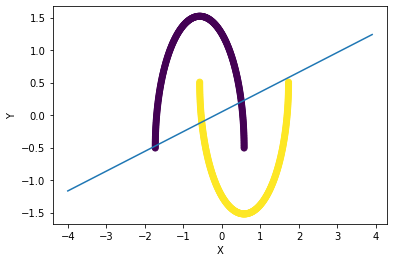

In [4]:
#plot
value_x=[x/10. for x in range(-40,+40)]
bias = model.intercept_
ws = model.coef_.T
value_y =  [(ws[0]*x+bias)/(-1*ws[1])for x in value_x]
plt.plot(value_x, value_y, label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()

In [5]:
#-------------------------Perform features transformation-----------------------------------
X_tran = X[:, np.newaxis]
Y_tran = Y[:, np.newaxis]
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X, Y, test_size=0.33)

In [6]:
#-------------------------build a polynomial logistic regression model----------------------
polynomial_features= PolynomialFeatures(degree=15)
x_poly_train = polynomial_features.fit_transform(X_train_)
x_poly_test_ = polynomial_features.fit_transform(X_test_)
model.fit(x_poly_train,Y_train_)
#to make predictions on our test data
Y_pred_ = model.predict(x_poly_test_)

In [7]:
#evaluating
print("The report of Polynomial Logistic Regression model: ")
print(classification_report(Y_test_, Y_pred_))



The report of Polynomial Logistic Regression model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        82

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



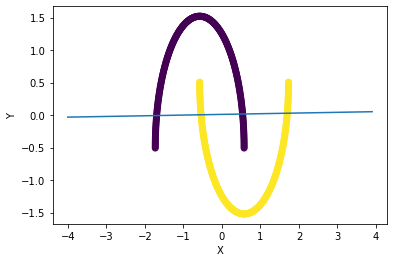

In [8]:
#plot
value_x=[x/10. for x in range(-40,+40)]
bias = model.intercept_
ws = model.coef_.T
value_y =  [(ws[0]*x+bias)/(-1*ws[1])for x in value_x]
plt.plot(value_x, value_y, label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()